## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Importing the dataset

In [2]:
df= pd.read_csv("master.csv")

# Business Understanding
**GOAL**
Prevetion of suicide

**Objectives**
1. Which age group (Generation) commits suicide -> find the age group and focus on that age group to avoid suicide 
2. Which gender commits suicide -> suicide rate between male and female -> looking at the popluation (male/female),what could be the reason
3. How is the suicide rate growing from 1985-2016 in a country-> percentage of increase per year for a country
4. Relation between population and suicide number and GDP per capita-> does country with high population/low income have more suicide rate? Why?

HDI = Human development index -> A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of livinga long and healthy life, knowledge and a decent standard of living

**Classifiers**
k-Nearest Neighbors,
Linear Regression,
Decision Tree,
Random Forest

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.iloc[:, 9] = df.iloc[:, 9].str.replace(',','')  #removing , from gdp_for_year ($) to convert to numeric value
df.iloc[:, 9]=pd.to_numeric(df.iloc[:, 9])
todrop=['HDI for year']
df.drop(columns=todrop, inplace=True) # dropping unwanted columns and duplicate attributes/ derived values
df.columns = ['country', 'year','sex','age','suicides_no','population','suicide_rate','country_year','gdp_for_year','gdp_per_capita','generation']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country_year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  int64  
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


### Corrrelation Heatmap and Outlier Analysis

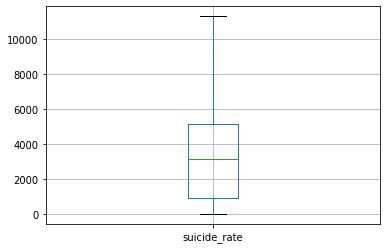

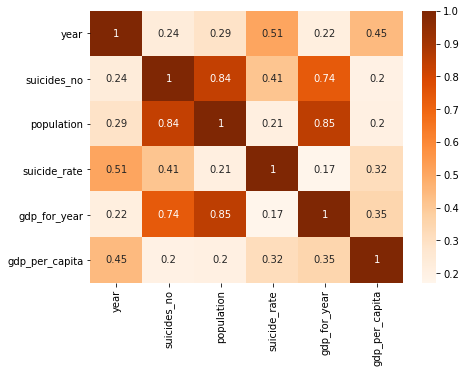

In [6]:
rate=df.groupby(['country']).sum()
rate.sort_values(by=['suicide_rate'],ascending=False,inplace=True)
rate.boxplot(column=['suicide_rate']) #outlier analysis
#no outliers

rate['suicide_rate'].describe()

corr=rate.corr(method='pearson')
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='Oranges')

plt.show()



### Age and Suicide Relation

In [7]:
age = df.age.unique()
print("\nNumber of age groups:", len(age))
age


Number of age groups: 6


array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

,year,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,suicide_rate_scaled
age,,,,,,,
5-14 years,2001.173102,11.337093,1.821842e+06,0.620041,4.471009e+11,16815.56833,12.400824
15-24 years,2001.275312,174.179664,1.861902e+06,8.947154,4.452791e+11,16876.57346,178.943085
25-34 years,2001.275312,242.118053,1.817773e+06,12.186885,4.452791e+11,16876.57346,243.737699
35-54 years,2001.275312,528.250969,3.096917e+06,14.947441,4.452791e+11,16876.57346,298.948815
55-74 years,2001.275312,357.269065,1.896434e+06,16.155579,4.452791e+11,16876.57346,323.111590
75+ years,2001.275312,140.697544,5.737357e+05,23.955409,4.452791e+11,16876.57346,479.108186


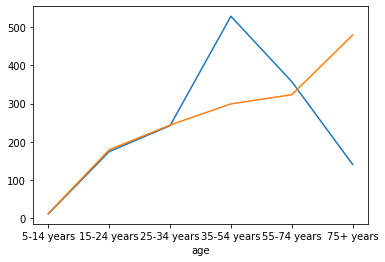

In [8]:
age=df.groupby(["age"]).mean()
rowindices = [3,0,1,2,4,5]   # sorting age group manually
age = age.iloc[np.array(rowindices)]
age['suicide_rate_scaled']=age['suicide_rate']*20  # scaling suicide rate for plot
age['suicides_no'].plot(label='suicide no')    #blue
age['suicide_rate_scaled'].plot(label= 'suicide rate') #orange
age

### Gender and Suicide Relation

87951.49374550697

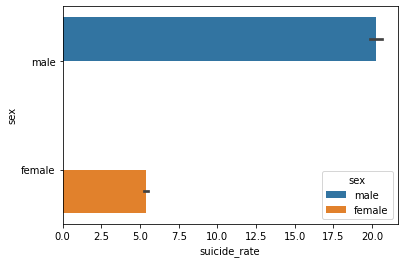

In [9]:
sex=df.groupby(["sex"]).mean()
sns.barplot(y="sex", x='suicide_rate', hue="sex", data=df)
sex['suicide_rate'].describe()
sex['population'][0]-sex['population'][1]



c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


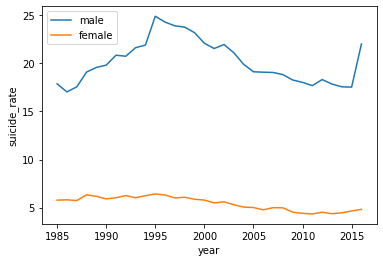

In [10]:

df_male = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_male.year, df.suicide_rate, ci = None)
sns.lineplot(df_women.year, df.suicide_rate, ci = None)
plt.legend(["male", 'female'])
plt.show()


### Overall annual suicide 

count    32.000000
mean     12.816324
std       1.380428
min      11.011464
25%      11.588993
50%      12.786180
75%      13.798339
max      15.662671
Name: suicide_rate, dtype: float64

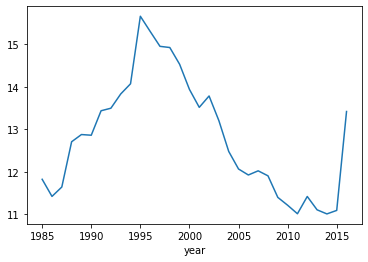

In [11]:
year=df.groupby(['year']).mean()
#rowindices = [3,0,1,2,4,5]
#year = year.iloc[np.array(rowindices)]
year['suicide_rate'].plot()
year['suicide_rate'].describe()


### Sucide Rate by Year for Countries with Highest Suicide 

In [12]:
highest_suicide=rate[:10]
highest_suicides=highest_suicide.index.values.tolist()
highest_suicides

['Russian Federation',
 'Lithuania',
 'Hungary',
 'Kazakhstan',
 'Republic of Korea',
 'Austria',
 'Ukraine',
 'Japan',
 'Finland',
 'Belgium']

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarnin

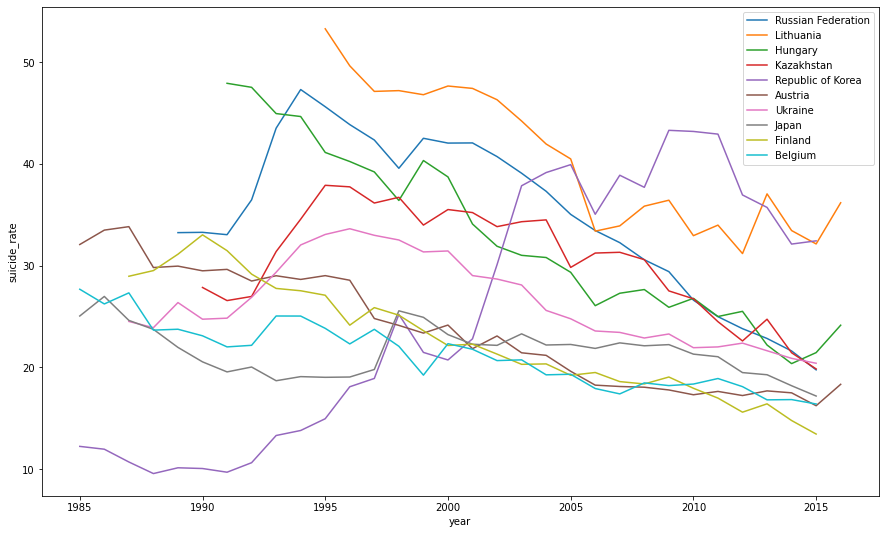

In [13]:
ax=plt.figure(figsize=(15,9))

for cu in highest_suicides:
    df_cu=df[df.country == cu]
    sns.lineplot(df_cu.year, df.suicide_rate, ci = None)
    plt.legend(highest_suicides)
plt.show()



#### Generation Attribute
Generation can be derived from age, thus it is redundant and wrongly interprated in this case

In [14]:
df['generation'].unique()
gen=df.groupby(["age",'generation']).sum()
gen

year  suicides_no  population  suicide_rate  \
age         generation                                                        
15-24 years Generation X     4213954       394312  4120530102      20226.32   
            Millenials       5075966       414230  4522416794      21306.37   
25-34 years Boomers          2296294       304163  2242665250      13885.37   
            Generation X     5371154       640551  4670589191      34129.18   
            Millenials       1622472       179198  1524849146       8556.97   
35-54 years Boomers          6061476      1689019  9249412272      48265.13   
            Generation X     1976232       491614  3388033866      12977.14   
            Silent           1252212       271508  1738441985       8143.75   
5-14 years  Generation X     1252212         6327  1292956133        315.81   
            Generation Z     2955886        15906  2503541842        944.18   
            Millenials       5017310        30031  4602195262       1598.40   
55-74 years Boomers          1622472       291316  1858434207      11412.55   
            G.I. Generation  1252212       208608  1078936112       9625.06   
            Silent           6415236      1158519  5865875021      53956.59   
75+ years   G.I. Generation  4213954       301401  1047266612      56083.80   
            Silent           5075966       351717  1616014641      55117.21   

                                 gdp_for_year  gdp_per_capita  
age         generation                                         
15-24 years Generation X      684925013609344        23064654  
            Millenials       1382060482776982        55276400  
25-34 years Boomers           347993664257858        11062836  
            Generation X     1164394170599316        45609088  
            Millenials        554597661529152        21669130  
35-54 years Boomers          1240913330392754        47018202  
            Generation X      658908062443534        25867996  
            Silent            167164103550038         5454856  
5-14 years  Generation X      167164103550038         5454856  
            Generation Z      949835197307338        37678558  
            Millenials        944135775506708        34386356  
55-74 years Boomers           554597661529152        21669130  
            G.I. Generation   167164103550038         5454856  
            Silent           1345223731307136        51217068  
75+ years   G.I. Generation   684925013609344        23064654  
            Silent           1382060482776982        55276400

### Scatter matrix for all attributes

<Figure size 1440x720 with 0 Axes>

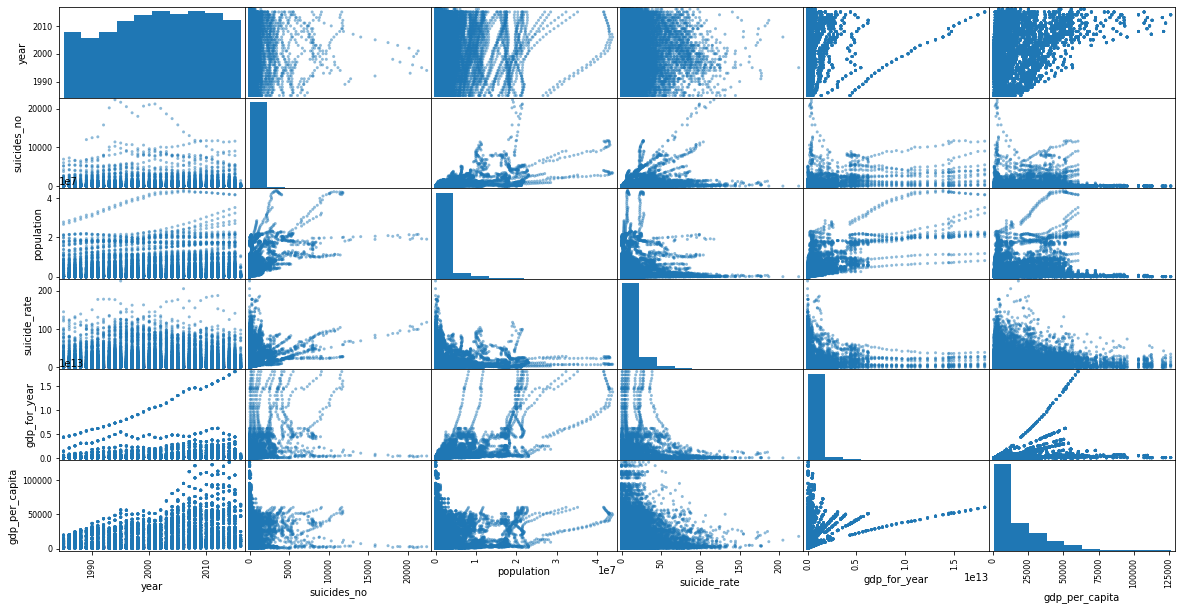

In [15]:

plt.figure(figsize=(20,10))
attributes = ['country', 'year','sex','age','suicides_no',
              'population','suicide_rate','gdp_for_year','gdp_per_capita','generation']
scatter_matrix(df[attributes], figsize=(20,10))
plt.show()


In [16]:
df.describe()

,year,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


## Data Cleaning

#### Transforming Categorical Attributes to One-Hot Vectors

In [17]:
df = df.sample(frac = 1)  # shuffeling the dataframe randomly 
df.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country_year,gdp_for_year,gdp_per_capita,generation
17878,Norway,1986,male,5-14 years,7,288100,2.43,Norway1986,78693253276,20117,Generation X
15548,Luxembourg,2005,male,15-24 years,6,27957,21.46,Luxembourg2005,37347394603,85397,Millenials
22160,Serbia,2014,male,75+ years,190,226079,84.04,Serbia2014,44210806366,6500,Silent
12220,Ireland,1998,female,25-34 years,10,271872,3.68,Ireland1998,90082034316,26115,Generation X
12048,Iceland,2016,male,35-54 years,11,44024,24.99,Iceland2016,20304098101,64708,Generation X


In [18]:
categorical_features=['country','sex','age']
numeric_features=['year','suicide_rate','suicides_no','population','gdp_for_year','gdp_per_capita']

In [19]:
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder())])

In [20]:
preprocessor=ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_features),
        #('num',numeric_features)
    ])

In [21]:
X=df.drop(['suicide_rate'],axis=1)
y= df['suicide_rate']

In [22]:
X=preprocessor.fit_transform(X)

In [23]:
print(X.shape,y.shape)


(27820, 109) (27820,)


#### Spliting Test and Train Sets

In [24]:
size=len(y)
train_size=0.8
x=int(train_size*size)
X_train=X[:x]
X_test=X[x:]
y_train=y[:x]
y_test=y[x:]

In [25]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((22256, 109), (5564, 109), (22256,), (5564,))

## Building and Training Models

#### Linear Regression

In [26]:
regg=LinearRegression()
regg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=regg.predict(X_test)

y_pred_test=regg.predict(X_test)
y_pred_train=regg.predict(X_train)

In [28]:
acc_train= regg.score(X_train, y_train)
acc_test = regg.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train)
print('Linear Regression: The RMSE of the testing set is:', rmse_test)

Linear Regression: Accuracy on training Data: 0.518
Linear Regression: Accuracy on test Data: 0.494

Linear Regression: The RMSE of the training set is: 13.154284014821947
Linear Regression: The RMSE of the testing set is: 13.492538478007077


#### Decision Tree

In [29]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
y_pred=tree.predict(X_test)

y_pred_test=tree.predict(X_test)
y_pred_train=tree.predict(X_train)

In [31]:
acc_train= tree.score(X_train, y_train)
acc_test = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train)
print('Decision Tree: The RMSE of the testing set is:', rmse_test)

Decision Tree: Accuracy on training Data: 0.850
Decision Tree: Accuracy on test Data: 0.817

Decision Tree: The RMSE of the training set is: 7.3324872531806395
Decision Tree: The RMSE of the testing set is: 8.110393663832168


#### K Nearest Neighbour

In [32]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [33]:
y_pred=knn.predict(X_test)

y_pred_test=knn.predict(X_test)
y_pred_train=knn.predict(X_train)

In [34]:
acc_train= knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

print("K Nearest Neighbour: Accuracy on training Data: {:.3f}".format(acc_train))
print("K Nearest Neighbour: Accuracy on test Data: {:.3f}".format(acc_test))
print('\nK Nearest Neighbour: The RMSE of the training set is:', rmse_train)
print('K Nearest Neighbour: The RMSE of the testing set is:', rmse_test)

K Nearest Neighbour: Accuracy on training Data: 0.826
K Nearest Neighbour: Accuracy on test Data: 0.794

K Nearest Neighbour: The RMSE of the training set is: 7.909623256641605
K Nearest Neighbour: The RMSE of the testing set is: 8.605505583099813


In [36]:
import scipy.stats as scs
def dependence_with_rating(col2,significance=0.05):
    newcol='No '+col2
    selected_columns = df[["suicide_rate",col2]]
    new_df = selected_columns.copy()
    new_df[newcol]=new_df[col2].apply(lambda x:1 if x==0 else 0)
    grouped=new_df.groupby(["suicide_rate"]).sum()
    chi, pval, dof, exp = scs.chi2_contingency(grouped)
    p = 1 - significance
    critical_value = scs.chi2.ppf(p, dof)
    chi=chi
    chitest=critical_value
    if chi > critical_value:
        result="Dependent" #We reject the null hypotheses. 
    else:
        result="Independent"
    return {'chi_square': chi, 'chi_test': chitest ,'dependence': result}
def chi_sq(result):
    chi_square=result['chi_square']
    return chi_square
def chi_test(result):
    chi_test=result['chi_test']
    return chi_test
def dependence(result):
    dependence=result['dependence']
    return dependence
    

In [38]:
age_groups=age.index.values.tolist()
age_groups

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

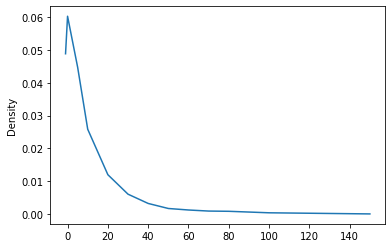

In [49]:
df_rate=df['suicide_rate']
ax = df_rate.plot.kde(ind=[-1,0,5,10,20,30,40,50,60,70,80,100,150])

In [40]:
df_chi

,age_groups
0,5-14 years
1,15-24 years
2,25-34 years
3,35-54 years
4,55-74 years
5,75+ years
